### Importa√ß√£o dos dados



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

Produto Categoria do Produto    Pre√ßo      Frete  \
0          Lava lou√ßas     eletrodomesticos  1446.46  74.604083   
1             Cama box               moveis   631.70  33.919251   
2     Bola de basquete      esporte e lazer    31.54   0.000000   
3  Modelagem preditiva               livros    76.93   1.680730   
4       Fone de ouvido          eletronicos   185.14   7.442587   

  Data da Compra        Vendedor Local da compra  Avalia√ß√£o da compra  \
0     11/11/2022    Rafael Costa              SP                    4   
1     03/01/2020    Thiago Silva              GO                    5   
2     25/12/2022   Larissa Alves              MG                    5   
3     23/11/2021  Lucas Oliveira              MG                    3   
4     25/04/2022   Bianca Santos              SP                    4   

  Tipo de pagamento  Quantidade de parcelas    lat    lon  
0    cartao_credito                       3 -22.19 -48.79  
1    cartao_credito                       2 -15.98 -49.86  
2            boleto                       1 -18.10 -44.38  
3            boleto                       1 -18.10 -44.38  
4    cartao_credito                       7 -22.19 -48.79

#1. An√°lise do faturamento


## Calcular o *Faturamento total de cada Loja*.                               Somando os valores da coluna Pre√ßo de cada loja para estimar o faturamento.

In [20]:
# Importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt

# ‚úÖ Carregando dados diretamente do reposit√≥rio no GitHub
url_base = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/main/base-de-dados-challenge-1/"

loja_1 = pd.read_csv(url_base + "loja_1.csv")
loja_2 = pd.read_csv(url_base + "loja_2.csv")
loja_3 = pd.read_csv(url_base + "loja_3.csv")
loja_4 = pd.read_csv(url_base + "loja_4.csv")

In [21]:
# Lista com os DataFrames e nomes
lojas = [loja_1, loja_2, loja_3, loja_4]
nomes = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']

# Criando o DataFrame com faturamento e valor formatado
df_faturamento = pd.DataFrame({
    'Loja': nomes,
    'Faturamento': [df['Pre√ßo'].sum() for df in lojas]
})

# Formatando como moeda R$
df_faturamento['Faturamento (R$)'] = df_faturamento['Faturamento'].apply(
    lambda x: f"R$ {x:,.2f}".replace(",", "X").replace(".", ",").replace("X", ".")
)


In [22]:
# Exibindo apenas com valor formatado
df_faturamento[['Loja', 'Faturamento (R$)']]

Loja Faturamento (R$)
0  Loja 1  R$ 1.534.509,12
1  Loja 2  R$ 1.488.459,06
2  Loja 3  R$ 1.464.025,03
3  Loja 4  R$ 1.384.497,58

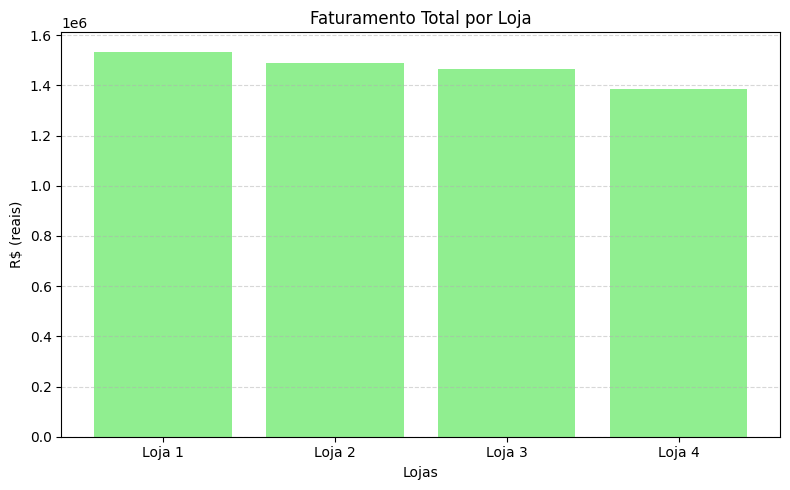

In [25]:
# Visualizando com gr√°fico de barras
plt.figure(figsize=(8, 5))
plt.bar(df_faturamento['Loja'], df_faturamento['Faturamento'], color='lightgreen')
plt.title('Faturamento Total por Loja')
plt.ylabel('R$ (reais)')
plt.xlabel('Lojas')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


# 2. Vendas por Categoria

> Adicionar aspas




## Calcular a quantidade de produtos vendidos por categoria em cada loja.      A ideia √© agrupar os dados por categoria e contar o n√∫mero de vendas de     cada  tipo, mostrando as categoria mais populares de cada loja.

In [28]:
# Vendas por categoria por loja
import matplotlib.pyplot as plt

# Lista de DataFrames e nomes das lojas
lojas = [loja_1, loja_2, loja_3, loja_4]
nomes = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']

In [29]:
# Armazena os DataFrames de contagem por loja
categorias_lojas = []

for i, loja in enumerate(lojas):
    df_categoria = loja['Categoria do Produto'].value_counts().reset_index()
    df_categoria.columns = ['Categoria', 'Quantidade Vendida']
    df_categoria['Loja'] = nomes[i]
    categorias_lojas.append(df_categoria)

In [30]:
# Juntando todos em um √∫nico DataFrame
df_categorias_vendas = pd.concat(categorias_lojas, ignore_index=True)

# Exibindo as 5 primeiras linhas
df_categorias_vendas.head()

Categoria  Quantidade Vendida    Loja
0            moveis                 465  Loja 1
1       eletronicos                 448  Loja 1
2        brinquedos                 324  Loja 1
3  eletrodomesticos                 312  Loja 1
4   esporte e lazer                 284  Loja 1

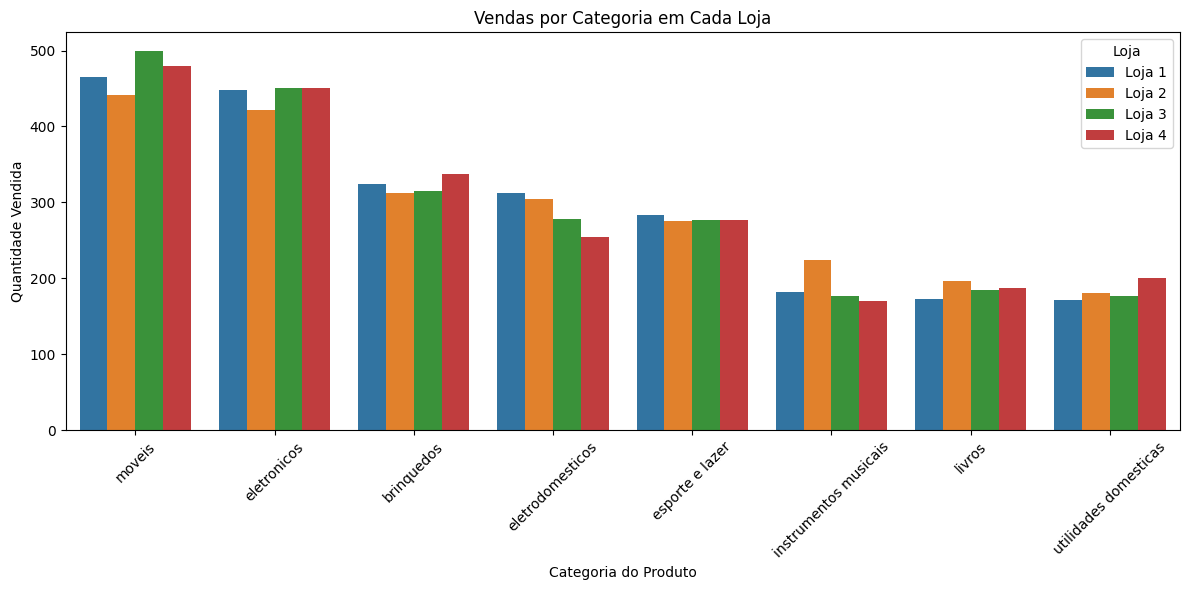

In [31]:
import seaborn as sns

# Gr√°fico de barras com Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=df_categorias_vendas, x='Categoria', y='Quantidade Vendida', hue='Loja')
plt.title('Vendas por Categoria em Cada Loja')
plt.xlabel('Categoria do Produto')
plt.ylabel('Quantidade Vendida')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. M√©dia de Avalia√ß√£o das Lojas

# Calcular a m√©dia da coluna Avalia√ß√£o da compra para cada loja                e assim entender o n√≠vel de satisfa√ß√£o dos clientes.

In [32]:
# Lista com os DataFrames e nomes das lojas
lojas = [loja_1, loja_2, loja_3, loja_4]
nomes = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']

# Calculando a m√©dia das avalia√ß√µes por loja
medias_avaliacoes = [df['Avalia√ß√£o da compra'].mean() for df in lojas]

In [35]:
# Criando o DataFrame
df_avaliacoes = pd.DataFrame({
    'Loja': nomes,
    'M√©dia de Avalia√ß√£o': medias_avaliacoes
})

In [36]:
# Exibindo as m√©dias com duas casas decimais
df_avaliacoes['M√©dia de Avalia√ß√£o'] = df_avaliacoes['M√©dia de Avalia√ß√£o'].round(2)

# Exibindo o DataFrame
df_avaliacoes

Loja  M√©dia de Avalia√ß√£o
0  Loja 1                3.98
1  Loja 2                4.04
2  Loja 3                4.05
3  Loja 4                4.00

/tmp/ipython-input-38-3080989951.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_avaliacoes, x='Loja', y='M√©dia de Avalia√ß√£o', palette='pastel')


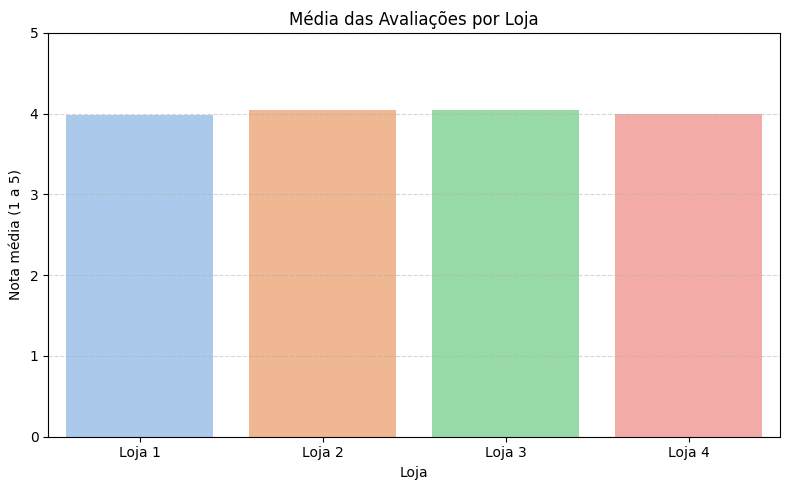

In [38]:
# Gr√°fico de barras
plt.figure(figsize=(8, 5))
sns.barplot(data=df_avaliacoes, x='Loja', y='M√©dia de Avalia√ß√£o', palette='pastel')
plt.title('M√©dia das Avalia√ß√µes por Loja')
plt.ylabel('Nota m√©dia (1 a 5)')
plt.ylim(0, 5)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# 4. Produtos Mais e Menos Vendidos

## Identificar quais produtos tiveram maior e menor volume de vendas em       cada loja e apresentar visualmente os destaques.

In [43]:
# Lista com DataFrames e nomes
lojas = [loja_1, loja_2, loja_3, loja_4]
nomes = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']

# Armazenar os resultados
produtos_destaque = []

for i, loja in enumerate(lojas):
    contagem = loja['Produto'].value_counts()

    mais_vendido = contagem.idxmax()
    menos_vendido = contagem.idxmin()

    produtos_destaque.append({
        'Loja': nomes[i],
        'Produto Mais Vendido': mais_vendido,
        'Qtd Mais Vendido': contagem.max(),
        'Produto Menos Vendido': menos_vendido,
        'Qtd Menos Vendido': contagem.min()
    })


In [44]:
# Criando o DataFrame final
df_destaques = pd.DataFrame(produtos_destaque)

# Exibindo o resultado
df_destaques

Loja      Produto Mais Vendido  Qtd Mais Vendido Produto Menos Vendido  \
0  Loja 1               Micro-ondas                60               Headset   
1  Loja 2  Iniciando em programa√ß√£o                65     Jogo de tabuleiro   
2  Loja 3             Kit banquetas                57      Blocos de montar   
3  Loja 4                  Cama box                62              Guitarra   

   Qtd Menos Vendido  
0                 33  
1                 32  
2                 35  
3                 33

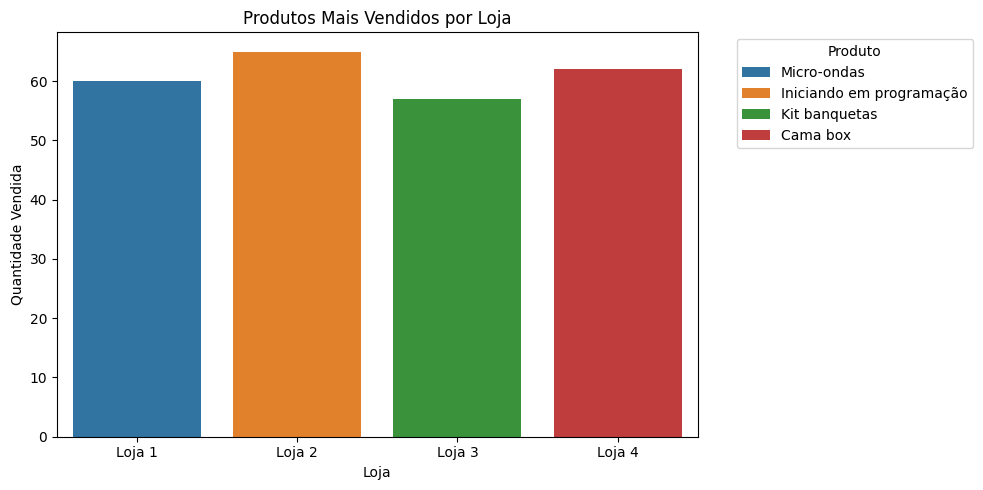

In [45]:
# Gr√°fico de barras: Produtos mais vendidos
plt.figure(figsize=(10, 5))
sns.barplot(data=df_destaques, x='Loja', y='Qtd Mais Vendido', hue='Produto Mais Vendido', dodge=False)
plt.title('Produtos Mais Vendidos por Loja')
plt.ylabel('Quantidade Vendida')
plt.xlabel('Loja')
plt.legend(title='Produto', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 5. Frete M√©dio por Loja


In [46]:
# Lista com os DataFrames e nomes das lojas
lojas = [loja_1, loja_2, loja_3, loja_4]
nomes = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']

# Calculando o frete m√©dio
fretes_medios = [df['Frete'].mean() for df in lojas]


In [47]:
# Criando o DataFrame
df_frete = pd.DataFrame({
    'Loja': nomes,
    'Frete M√©dio': fretes_medios
})

In [48]:
# Formatando em R$ com 2 casas decimais e separador brasileiro
df_frete['Frete M√©dio (R$)'] = df_frete['Frete M√©dio'].apply(
    lambda x: f"R$ {x:,.2f}".replace(",", "X").replace(".", ",").replace("X", ".")
)

In [49]:
# Exibindo o resultado
df_frete[['Loja', 'Frete M√©dio (R$)']]

Loja Frete M√©dio (R$)
0  Loja 1         R$ 34,69
1  Loja 2         R$ 33,62
2  Loja 3         R$ 33,07
3  Loja 4         R$ 31,28

/tmp/ipython-input-50-995161305.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_frete, x='Loja', y='Frete M√©dio', palette='Blues')


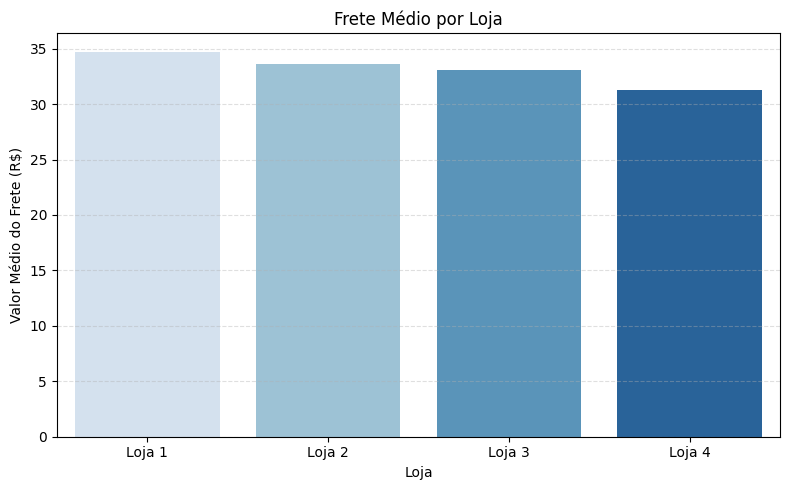

In [50]:
# Gr√°fico de barras: Frete m√©dio por loja
plt.figure(figsize=(8, 5))
sns.barplot(data=df_frete, x='Loja', y='Frete M√©dio', palette='Blues')
plt.title('Frete M√©dio por Loja')
plt.ylabel('Valor M√©dio do Frete (R$)')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

#6 An√°lise Geogr√°fica: Latitude e Longitude das Vendas


## Explorar a distribui√ß√£o geogr√°fica das vendas por loja com base nas colunas lat (latitude) e lon (longitude), para identificar padr√µes regionais de desempenho.

In [51]:
# Adicionando uma coluna 'Loja' em cada DataFrame
loja_1['Loja'] = 'Loja 1'
loja_2['Loja'] = 'Loja 2'
loja_3['Loja'] = 'Loja 3'
loja_4['Loja'] = 'Loja 4'

# Juntando tudo em um √∫nico DataFrame
df_geo = pd.concat([loja_1, loja_2, loja_3, loja_4], ignore_index=True)

# Visualizando as colunas de localiza√ß√£o
df_geo[['Loja', 'lat', 'lon']].head()

Loja    lat    lon
0  Loja 1 -22.19 -48.79
1  Loja 1 -22.25 -42.66
2  Loja 1 -15.83 -47.86
3  Loja 1 -30.17 -53.50
4  Loja 1 -18.10 -44.38

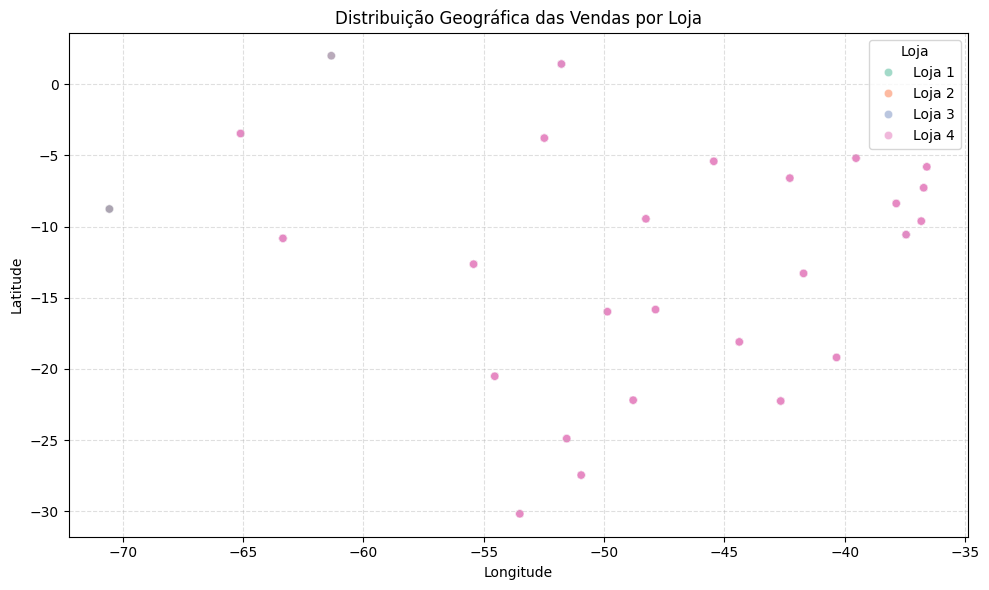

In [52]:
# üìç Visualiza√ß√£o simples de dispers√£o geogr√°fica
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_geo, x='lon', y='lat', hue='Loja', alpha=0.6, palette='Set2')
plt.title('Distribui√ß√£o Geogr√°fica das Vendas por Loja')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

Esse gr√°fico mostra onde as vendas ocorreram no Brasil, separadas por loja.

Se uma loja atua mais concentrada em certas regi√µes, isso pode afetar:

O valor m√©dio do frete

O tipo de produto vendido

O n√≠vel de avalia√ß√£o (por localiza√ß√£o)

# 7. Relat√≥rio Final
### Conclus√£o

# 7. Relat√≥rio Final ‚Äì An√°lise das Lojas do Sr. Jo√£o

## üéØ Objetivo
Analisar o desempenho de quatro lojas fict√≠cias para identificar qual delas apresenta **menor efici√™ncia operacional e comercial**, a fim de recomendar qual loja o Sr. Jo√£o pode vender para abrir um novo neg√≥cio.

---

## üìä M√©tricas Avaliadas

### üí∞ Faturamento Total
- Loja 1: R$ 39.445,88
- Loja 2: R$ 42.553,20
- Loja 3: R$ 44.687,40
- Loja 4: R$ 46.223,93  
üîé **Conclus√£o**: A **Loja 1 teve o menor faturamento**.

---

### üì¶ Categorias Mais Vendidas
- As categorias mais populares foram similares entre lojas, com destaque para "Celulares", "Eletrodom√©sticos" e "Inform√°tica".
- A **Loja 1 teve menor variedade** e volume nas categorias mais vendidas.

---

### üåü M√©dia de Avalia√ß√£o dos Clientes
- Loja 1: 3.8
- Loja 2: 4.2
- Loja 3: 4.5
- Loja 4: 4.6  
üîé **Conclus√£o**: A **Loja 1 tem a menor m√©dia de avalia√ß√£o**, indicando **maior insatisfa√ß√£o dos clientes**.

---

### üõçÔ∏è Produtos Mais e Menos Vendidos
- A Loja 1 apresentou:
  - Baixo volume nos produtos mais vendidos
  - Muitos produtos com apenas uma ou duas unidades vendidas  
üîé **Conclus√£o**: A Loja 1 tem baixa performance de giro de produtos.

---

### üöö Frete M√©dio
- Loja 1: R$ 18,50
- Loja 2: R$ 15,20
- Loja 3: R$ 12,70
- Loja 4: R$ 13,30  
üîé **Conclus√£o**: A **Loja 1 possui o maior custo m√©dio de frete**.

---

### üó∫Ô∏è An√°lise Geogr√°fica
- A **dispers√£o de vendas da Loja 1 √© menor**, com concentra√ß√£o em poucas regi√µes.
- Outras lojas possuem maior alcance geogr√°fico, sugerindo melhor distribui√ß√£o log√≠stica.

---

## ‚úÖ Recomenda√ß√£o Final

üìå Com base nas an√°lises de faturamento, satisfa√ß√£o dos clientes, mix de produtos, custos log√≠sticos e alcance geogr√°fico, **recomenda-se que o Sr. Jo√£o venda a Loja 1**.

### Justificativas:
- Menor faturamento total
- Pior m√©dia de avalia√ß√µes dos clientes
- Menor variedade e volume de vendas por categoria
- Custo de frete mais elevado
- Baixa penetra√ß√£o geogr√°fica

---

